In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [34]:
# Read in the Data
results = pd.read_csv('../CleanData/merge_di.csv')
results.head()

,Year,State,Deaths,Avg Income (12-17)
0,2017,Alabama,53238.0,37782.0
1,2016,Alabama,52466.0,37782.0
2,2015,Alabama,51909.0,37782.0
3,2014,Alabama,50215.0,37782.0
4,2013,Alabama,50189.0,37782.0


In [35]:
#Reorder columns 
new_df=results[['State', 'Year', 'Avg Income (12-17)', 'Deaths']]
new_df

,State,Year,Avg Income (12-17),Deaths
0,Alabama,2017,37782.0,53238.0
1,Alabama,2016,37782.0,52466.0
2,Alabama,2015,37782.0,51909.0
3,Alabama,2014,37782.0,50215.0
4,Alabama,2013,37782.0,50189.0
...,...,...,...,...
301,Wyoming,2016,55923.0,4722.0
302,Wyoming,2015,55923.0,4778.0
303,Wyoming,2014,55923.0,4666.0
304,Wyoming,2013,55923.0,4516.0


In [36]:
# col_list= list(new_df)

In [37]:
# new_df['Sum'] = new_df[col_list].sum(axis = 1)
# new_df

In [38]:
# new_df['Mean'] = new_df[col_list].mean(axis = 1)
# new_df

In [39]:
new_df2 = pd.get_dummies(new_df, prefix=['State'], columns=['State'])
new_df2

,Year,Avg Income (12-17),Deaths,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2017,37782.0,53238.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,37782.0,52466.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,37782.0,51909.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,37782.0,50215.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,37782.0,50189.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2016,55923.0,4722.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
302,2015,55923.0,4778.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
303,2014,55923.0,4666.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
304,2013,55923.0,4516.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
new_df3 = pd.get_dummies(new_df2, prefix=['Year'], columns=['Year'])
new_df3

,Avg Income (12-17),Deaths,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,37782.0,53238.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,37782.0,52466.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37782.0,51909.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,37782.0,50215.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,37782.0,50189.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,55923.0,4722.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
302,55923.0,4778.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
303,55923.0,4666.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
304,55923.0,4516.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [41]:
# Assign the data to X and y

X = new_df3[["Avg Income (12-17)", 'State_Alabama', 'State_Alaska',
            'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware',
            'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
            'State_Kentucky', 'State_Louisiana',  'State_Washington', 'State_West Virginia', 'State_Wisconsin', 'State_Wyoming',
            'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017']]

y = new_df3[["Deaths"]].values.reshape(-1,1)

print(X.shape, y.shape)

(306, 28) (306, 1)


In [42]:
# Create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# Create a StandardScater model and fit to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Use the X_scaler/y_scaler to transform
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [44]:
# Create LinearRegression model and fit to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

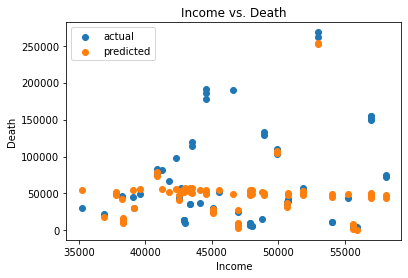

In [45]:
X2 = X_test["Avg Income (12-17)"]

plt.scatter(X2, y_test, label="actual")
plt.scatter(X2, y_scaler.inverse_transform(model.predict(X_test_scaled)), label= "predicted")

plt.legend()

plt.xlabel("Income")
plt.ylabel("Death")
plt.title("Income vs. Death")

plt.savefig("../static/images/IncomevsDeath.png", bbox_inches='tight')

In [46]:
# Score data based on scaled model
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4105914008089232
Testing Score: 0.3969645454617219


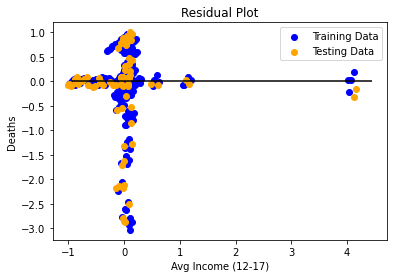

In [48]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.gca().set(xlabel='Avg Income (12-17)', ylabel='Deaths')
# plt.show()

plt.savefig("../static/images/residual_plot.png", bbox_inches='tight')

# plt.show()